<a href="https://colab.research.google.com/github/evakosova/Machine_learning/blob/main/ML_OpenVsGlobular_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginning

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split 

In [3]:
PATH = "drive/MyDrive/Colab Notebooks/ML_exam/images"  #directory to folders with images
categories = ['open', 'globular'] 

#creating dataset with all the images
Mydataset = []
def create_dataset():
    IMG_SIZE = 100     #how many pixels should the new images have
    for i in categories:   #creating loop to get through all images
        path = os.path.join(PATH, i)  #path to open clusters and globular clusters
        classification = categories.index(i)  #classification - 0 for open cluster, 1 for globular cluster
        for img in os.listdir(path):  #with lstdir we create list of images
            img_list = cv2.imread(os.path.join(path,img))  #load image from our path
            new_list = cv2.resize(img_list, (IMG_SIZE,IMG_SIZE))   #resizing the original images 
            Mydataset.append([new_list, classification])

create_dataset()
print(len(Mydataset)) #checking how many images are in the final dataset

1092


In [4]:
import random

random.shuffle(Mydataset) #randomly shuffling my dataset
#to make sure the shuffel worked well, I will look at the classification of first 20 images 
#0=open cluster
#1=globular cluster
for image in Mydataset[:20]:
  print(image[1]) #vypíšeme si druhý sloupeček v našem datasetu, které udávají labely obrázku (open=0, globular=1)

1
0
0
0
1
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0


In [5]:
#z původního formátu dat (list) vytvoříme formát array, který nám model zvládne zpracovat
x_data = []
y_data = []
for img_x,label in Mydataset[:]:
  x_data.append(img_x)
  y_data.append(label) 

x_data = np.array(x_data)
y_data = np.array(y_data)
#print(x_data)
#print(y_data)
print(x_data.shape) #můžeme se podívat na parametry vytvořeného pole (pošet položek, rozměry v x a y, barevnost)
print(y_data.shape) 

(1092, 100, 100, 3)
(1092,)


# Deviding & verifying data 

In [6]:
#dataset si rozdělíme na trénovací a testovací data, pomě trénovacích a testovacích bude 7:3 
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, train_size=0.7)

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape) #kolik máme nakonec trénovacích dat
print(np.bincount(y_train)) #zastoupení jednotlivých tříd objektů, mělo by být cca rovnoměrné

(764, 100, 100, 3)
[417 347]


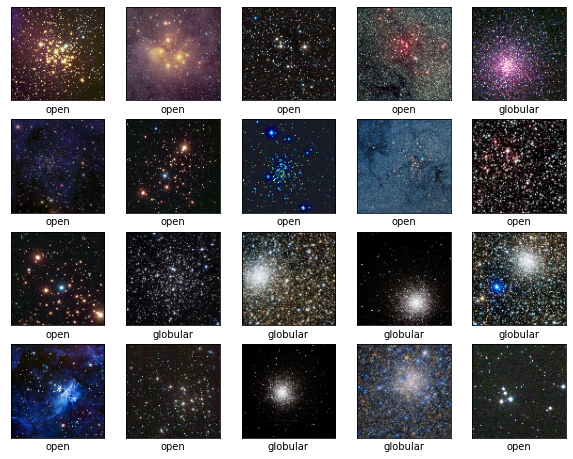

First 10 train labels:
0
0
0
0
1
0
0
0
0
0


In [7]:
import matplotlib.pyplot as plt

#ploting first 20 images in dataset to verify the data
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(categories[y_train[i]])
plt.show()

#plotnutí prvních 10 labelů v trénovacích datech
print ('First 10 train labels:')
for item in y_train[0:10]:
  print(item)

In [8]:
#vypíšeme si rozměr dat
print(x_train.shape)
print(y_train.shape)

(764, 100, 100, 3)
(764,)


# Model


In [15]:
model = models.Sequential()
#přidáváme konvoluční vrstvu
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
#64 = počet filtrů, o velikosti 3x3 px (matice, kterými bude síť skenovat vstupní obrázek)
#Maxpooling vrstva nám redukuje počet informací, aplikuje jen matem. operaci
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#flatten nám přetransformuje matice z poslední konvoluční vrstvy do jednoho vektoru
model.add(layers.Flatten()) 
model.add(layers.Dense(32, activation='relu'))
#výstupní vrstva má tolik neuronů kolik je klasifikačních kategorií
model.add(layers.Dense(2))

#Visualization of the model
model.summary()

#configure the model for training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 14112)            

# Training the model 


In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=50, 
                    validation_data=(x_test, y_test))
#bach size udava velikost kroku, s každým krokem by se měla změnšovat

Epoch 1/10
16/16 [==============================] - 30s 2s/step - loss: 0.6768 - accuracy: 0.5445 - val_loss: 0.6427 - val_accuracy: 0.5091
Epoch 2/10
16/16 [==============================] - 21s 1s/step - loss: 0.5569 - accuracy: 0.6204 - val_loss: 0.5279 - val_accuracy: 0.6555
Epoch 3/10
16/16 [==============================] - 20s 1s/step - loss: 0.4789 - accuracy: 0.7683 - val_loss: 0.5213 - val_accuracy: 0.8110
Epoch 4/10
16/16 [==============================] - 26s 2s/step - loss: 0.4796 - accuracy: 0.8312 - val_loss: 0.4986 - val_accuracy: 0.8140
Epoch 5/10
16/16 [==============================] - 25s 2s/step - loss: 0.4398 - accuracy: 0.8639 - val_loss: 0.4818 - val_accuracy: 0.8537
Epoch 6/10
16/16 [==============================] - 17s 1s/step - loss: 0.3989 - accuracy: 0.8966 - val_loss: 0.4366 - val_accuracy: 0.8841
Epoch 7/10
16/16 [==============================] - 17s 1s/step - loss: 0.3506 - accuracy: 0.8914 - val_loss: 0.3108 - val_accuracy: 0.8659
Epoch 8/10
16/16 [==

# Evaluation of data


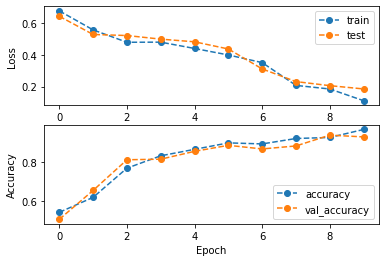

In [17]:
#ploting loss and accuracy function
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(history.history['loss'], label='train', marker="o", linestyle="dashed")
ax1.plot(history.history['val_loss'], label='test', marker="o", linestyle="dashed")
ax1.set_xlabel("Epoch")
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
ax2.plot(history.history['accuracy'], label='accuracy', marker="o", linestyle="dashed")
ax2.plot(history.history['val_accuracy'], label = 'val_accuracy', marker="o", linestyle="dashed")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')


In [18]:
test_loss, test_acc= model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc*100, '%')

11/11 [==============================] - 2s 149ms/step - loss: 0.1848 - accuracy: 0.9268
Test accuracy: 92.68292784690857 %


In [39]:
#explicit class prediction by our model
x_pred=model.predict(x_test) 
y_pred=np.argmax(x_pred,axis=1)

print(y_pred[:30]) #predicted classification of furst 30 images in testing dataset
print(y_test[:30]) #validation classification

[0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1]
[0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1]
